# Sampling from Beta

https://en.wikipedia.org/wiki/Beta_distribution
https://mathworld.wolfram.com/BetaFunction.html
https://bookdown.org/rdpeng/advstatcomp/rejection-sampling.html Their `c`is my `M`

a und b muessen > 1 sein.
sup f/g is finite iff a > 1 and b > 1 

proposal distribution g: uniform
target distribution f: beta

sup = max but also defined on open sets


In [31]:
import numpy as np
from scipy.special import gamma
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
def uniform(x): # proposal distribution
    return 1

def Beta(a,b): # beta function to normalize beta distribution
    return gamma(a)*gamma(b)/gamma(a+b) # visualbasic sollte die gamma function haben

def beta(x, a, b): # beta distribution density function, pdf
    kernel = x**(a-1)*(1-x)**(b-1)
    normalizer = Beta(a,b)
    return kernel/normalizer

# argmax of beta distribution pdf
def beta_mode(a,b):
    if a>1 and b>1:
        return (a-1)/(a+b-2)
    elif a>1:
        return 1
    elif b>1:
        return 0
    else:
        raise ValueError("Mode not defined on uniform distribution.")

# pdf: probability density function
# get maximum of beta distribution
def max_beta(a,b):
    return beta(beta_mode(a,b),a,b)

In [37]:
NUM_SAMPLES = 100000
A = 1.001
B = 100
M = max_beta(A,B)
print(f"{M=}")
samples = []
n_generated = 0

while len(samples) < NUM_SAMPLES:
    n_generated += 1
    x = np.random.uniform(0,1) # sample from proposal density g
    if np.random.uniform(0,1) < 1/M*beta(x, A,B)/uniform(x):
        samples.append(x)
# expected acceptance ratio ist 1/M
print(f"Acceptance Ratio: {len(samples)/n_generated:.4f}")

M=99.27103793611083
Acceptance Ratio: 0.0101


/Users/cornelius/anaconda3/envs/general/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


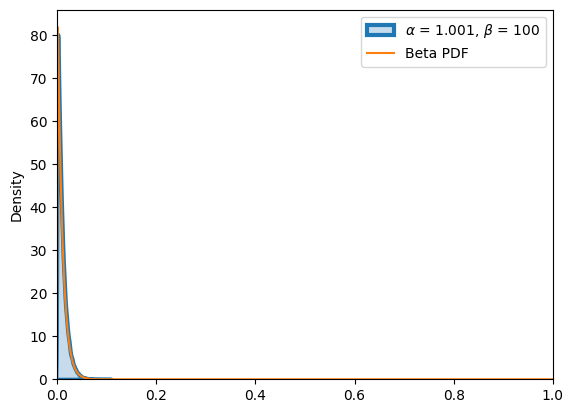

In [39]:
def plot_beta(a,b,sample):
    sns.distplot(sample, hist=False, kde=True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = r'$\alpha$ = {}, $\beta$ = {}'.format(a,b))
    plt.xlim(0, 1)
    sns.lineplot(x=np.linspace(0,1,500), y=beta(np.linspace(0,1,500),a,b), label="Beta PDF")
    plt.show()

plot_beta(A,B,samples)